In [1]:
# Import Libraries and Load the Data
### First, import the necessary libraries and load the dataset into a pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # For visualizing data.
%matplotlib inline
import datetime

# Load the Bank Data

In [3]:
df = pd.read_csv('../data/myusabank.csv')
df['Date'] = pd.to_datetime(df['Date'])

Details: Load data for a bank's stock prices from a CSV file. Reads a CSV file (myusabank.csv) containing bank financial data into a DataFrame named df and converts the Date column from a string format to a datetime object. This makes it easier to filter data based on dates later in the code.

#  Load the S&P 500 Data

In [4]:
spx_df = pd.read_csv('../data/S&P 500 (SPX)HistoricalData_1730734525504.csv')
spx_df['Date'] = pd.to_datetime(spx_df['Date'])

Details: Load historical S&P 500 data for comparison with the bank's stock prices. Reads another CSV file (S&P 500 historical data) into a DataFrame named spx_df. It converts the Date column to a datetime object for easy filtering by date range.

# Define the Date Range for Analysis

In [5]:
start_date = '2022-01-03'
end_date = '2023-03-23'

Details: Set the start and end dates for the data range of interest and it assigns two specific dates that act as filters, allowing you to focus on data from early 2022 through early 2023.

# Filter Both DataFrames Based on the Date Range

In [6]:
bank_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)][['Date', 'Stock_Price']]
spx_df_filtered = spx_df[(spx_df['Date'] >= start_date) & (spx_df['Date'] <= end_date)][['Date', 'Close/Last']]

Purpose: Isolate the relevant rows in both the bank and S&P 500 DataFrames based on the specified date range.
Details:
    Filters the df DataFrame (bank data) for rows where the Date falls within the date range, and selects only the Date and Stock_Price columns.
    Similarly, filters the spx_df DataFrame (S&P 500 data) for dates within the range and selects the Date and Close/Last columns.

# Rename Columns for Clarity

In [7]:
bank_df = bank_df.rename(columns={'Stock_Price': 'Bank_Stock_Price'})
spx_df_filtered = spx_df_filtered.rename(columns={'Close/Last': 'S&P500'})

In [87]:
bank_df = bank_df.rename(columns={'date': 'Date'})
spx_df_filtered = spx_df_filtered.rename(columns={'date': 'Date'})

Details: Make column names clearer in both DataFrames and renames Stock_Price in bank_df to Bank_Stock_Price, helping distinguish it from the S&P 500 data, renames Close/Last in spx_df_filtered to S&P500, making it clear that this column contains S&P 500 closing prices.

# Merge the DataFrames on the 'Date' Column

In [107]:
merged_df = pd.merge(bank_df, spx_df_filtered, how = 'inner', on = ['Date'])

In [108]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']) 

In [109]:
print(merged_df.columns)

Index(['Date', 'Bank_Stock_Price', 'S&P500'], dtype='object')


Purpose: Combine the bank and S&P 500 data into a single DataFrame based on matching dates.
Details:
    Uses an inner join to merge bank_df and spx_df_filtered on the Date column.
    The how='inner' parameter ensures that only rows with dates present in both data sets are included.

# Display the First Few Rows of the Merged Data

In [110]:
merged_df.head()

,Date,Bank_Stock_Price,S&P500
0,2022-01-03,128,4796.56
1,2022-01-04,63,4793.54
2,2022-01-05,196,4700.58
3,2022-01-06,177,4696.05
4,2022-01-07,103,4677.03


Details: Inspect the initial rows of the merged data and head() displays the first few rows, allowing you to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

In [111]:
merged_df.tail()

,Date,Bank_Stock_Price,S&P500
316,2023-03-03,169,4045.64
317,2022-08-23,53,4128.73
318,2022-05-04,123,4300.17
319,2023-01-18,142,3928.86
320,2023-03-23,106,3948.72


Details: Inspect the initial rows of the merged data and tail() displays the first few rows, allowing you to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

### Check the  description

In [112]:
merged_df.describe()

,Date,Bank_Stock_Price,S&P500
count,321,321.000000,321.000000
mean,2022-08-13 12:47:06.168224256,125.467290,4082.772897
min,2022-01-03 00:00:00,51.000000,3577.030000
25%,2022-04-22 00:00:00,92.000000,3899.380000
50%,2022-08-15 00:00:00,123.000000,4016.220000
75%,2022-12-02 00:00:00,160.000000,4277.880000
max,2023-03-23 00:00:00,199.000000,4796.560000
std,NaN,41.510914,269.775065


Details: Inspect the  merged data  description displays the count, mean, min max and std  to verify that the merge worked correctly and that the columns (Date, Bank_Stock_Price, and S&P500) contain the expected data.

# Visualizations and Exploratory Data Analysis (EDA)

## Visualizing the Bank Stock Price and S&P 500 on the same figure

### Plotting the Data 
Use matplotlib and seaborn to create a line plot that shows both the bank's stock price and the S&P 500 index over time. This gives a visual representation of how the two move together or differ over the period.

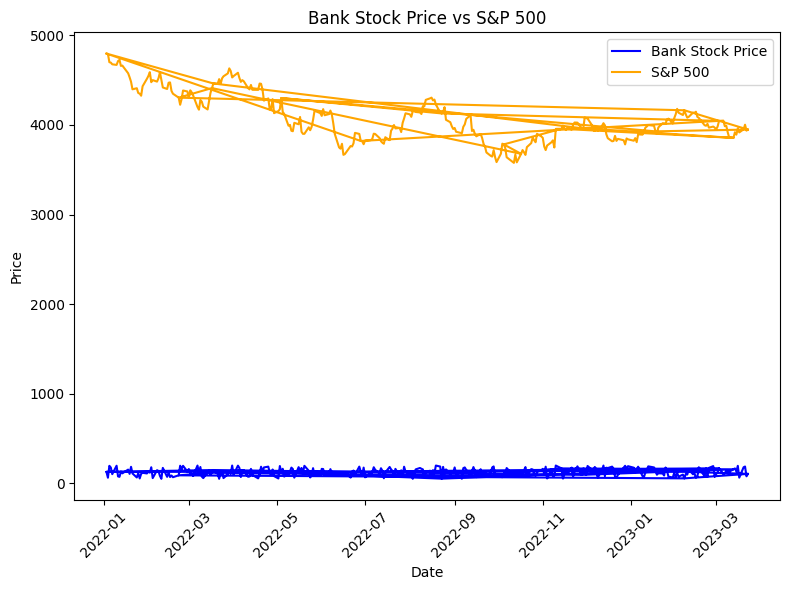

In [113]:
sns.set_style = ("whitegrid") # Set the plot style for better aesthetics
plt.figure(figsize=(8, 6)) # Initialize the figure and size
plt.plot(merged_df['Date'], merged_df['Bank_Stock_Price'], label='Bank Stock Price', color='blue')
plt.plot(merged_df['Date'], merged_df['S&P500'], label='S&P 500', color='orange')
plt.title("Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend() # Add a legend to distinguish the lines
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Use tight layout for better spacing
plt.show() # Display the plot

This code plots Bank_Stock_Price and S&P500 on the same graph, with distinct colors and a legend to differentiate them.

# Calculating Correlation Coefficients

A correlation coefficient will indicate the degree to which the bank's stock price moves in relation to the S&P 500 index. Correlation values range from -1 (perfect inverse correlation) to +1 (perfect positive correlation).

### A. Calculate the correlation between Bank Stock Price and S&P 500
    Use .corr() to calculate the correlation coefficient between the bank's stock price and the S&P 500.

In [13]:
# Calculate the correlation between Bank Stock Price and S&P 500
correlation = merged_df['Bank_Stock_Price'].corr(merged_df['S&P500'])

# Print the correlation
print(f"Correlation between Bank Stock Price and S&P 500: {correlation:.2f}")

Correlation between Bank Stock Price and S&P 500: -0.06


This code calculates the Pearson correlation coefficient between the bank stock prices and S&P 500 data and A result show a correlation value close to -1 indicates a strong negative relationship.


### B. Create a Correlation Matrix for All Metrics
    Generate a correlation matrix to calculate the pairwise correlations between all numerical columns.

In [14]:
merged_df['Bank_Returns'] = merged_df['Bank_Stock_Price'].pct_change()
merged_df['SP500_Returns'] = merged_df['S&P500'].pct_change()
merged_df.rename(columns=lambda x: x.strip(), inplace=True)
# Select relevant financial metrics for correlation analysis
financial_metrics = merged_df[['Bank_Stock_Price', 'S&P500', 'Bank_Returns', 'SP500_Returns']]
# Calculate the correlation matrix
correlation_matrix = financial_metrics.corr()

# Print the correlation matrix
print(correlation_matrix)


                  Bank_Stock_Price    S&P500  Bank_Returns  SP500_Returns
Bank_Stock_Price          1.000000 -0.055693      0.630573       0.011571
S&P500                   -0.055693  1.000000      0.038316       0.161948
Bank_Returns              0.630573  0.038316      1.000000       0.023457
SP500_Returns             0.011571  0.161948      0.023457       1.000000


The correlation matrix show the correlations between all pairs of metrics:
Bank stock price and S&P 500.
Bank returns and S&P 500 returns.
Cross-metrics like bank stock price vs. S&P 500 returns.

### C. Plot a Correlation Heatmap
    A heatmap visually represents the correlation matrix, making it easier to identify strong relationships.

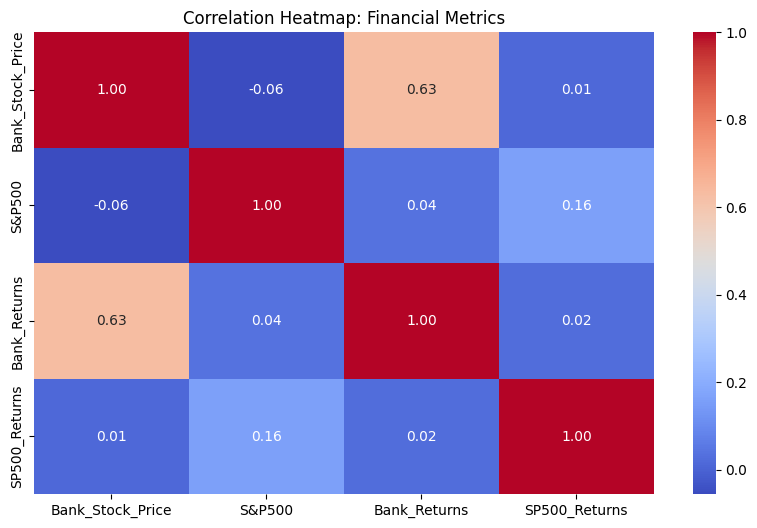

In [15]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Add title and labels
plt.title("Correlation Heatmap: Financial Metrics")
plt.show()

Explanation:
    annot=True displays the correlation values on the heatmap.
    cmap="coolwarm" specifies the color scheme.
    Values closer to red or blue extremes indicate stronger positive or negative correlations.

Conclusion
    High Correlation: A high positive correlation implies that the bank's stock price moves in tandem with the market.
    Low or Negative Correlation: Indicates the bank’s stock price behaves independently or inversely to the market.
    The heatmap provides a holistic view of relationships between all metrics, allowing you to uncover additional insights about stock performance and volatility.

# Analyzing Trends

To analyze trends and calculate rolling averages or plot percentage changes to see how the bank's stock price compares with the overall market trend.

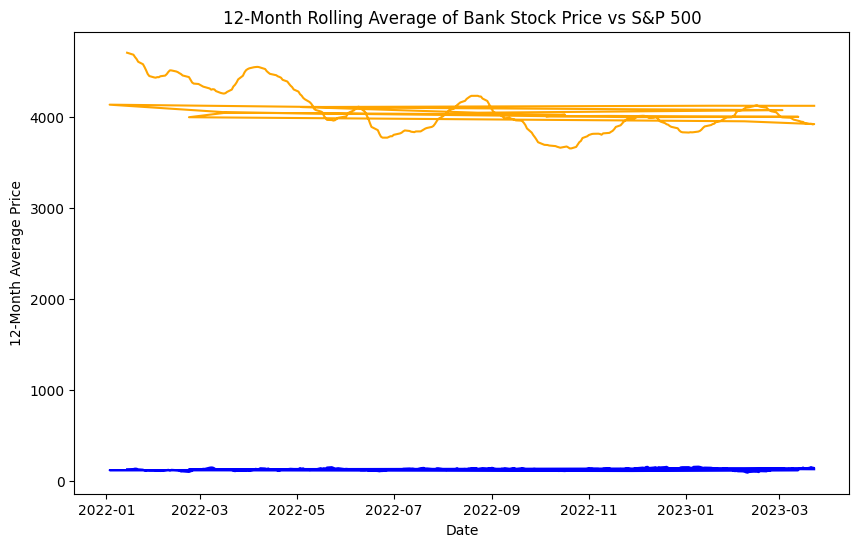

In [114]:
# Calculate the 30-day rolling averages
#merged_df['Bank_30Day_MA'] = merged_df['Bank_Stock_Price'].rolling(window=30).mean()
#merged_df['SP500_30Day_MA'] = merged_df['S&P500'].rolling(window=30).mean()
#plt.figure(figsize=(10, 6))
#plt.plot(merged_df['Date'], merged_df['Bank_30Day_MA'], label='Bank 30-Day MA', color='blue')
#plt.plot(merged_df['Date'], merged_df['SP500_30Day_MA'], label='S&P 500 30-Day MA', color='orange')
#plt.title("30-Day Rolling Average of Bank Stock Price vs S&P 500")
#plt.xlabel("Date")
#plt.ylabel("30-Day Average Price")
#plt.legend()
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

merged_df['Bank_12month_MA'] = merged_df['Bank_Stock_Price'].rolling(window=10).mean()
merged_df['SP500_12month_MA'] = merged_df['S&P500'].rolling(window=10).mean()
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Bank_12month_MA'], label='Bank 12-Month MA', color='blue')
plt.plot(merged_df['Date'], merged_df['SP500_12month_MA'], label='S&P 500 12-Month MA', color='orange')
plt.title("12-Month Rolling Average of Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("12-Month Average Price")
#plt.legend()
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


Rolling averages can smooth out daily fluctuations and highlight broader trends.

## Daily Percentage Change

Percentage change can help to compare the volatility of the bank’s stock price against the S&P 500.

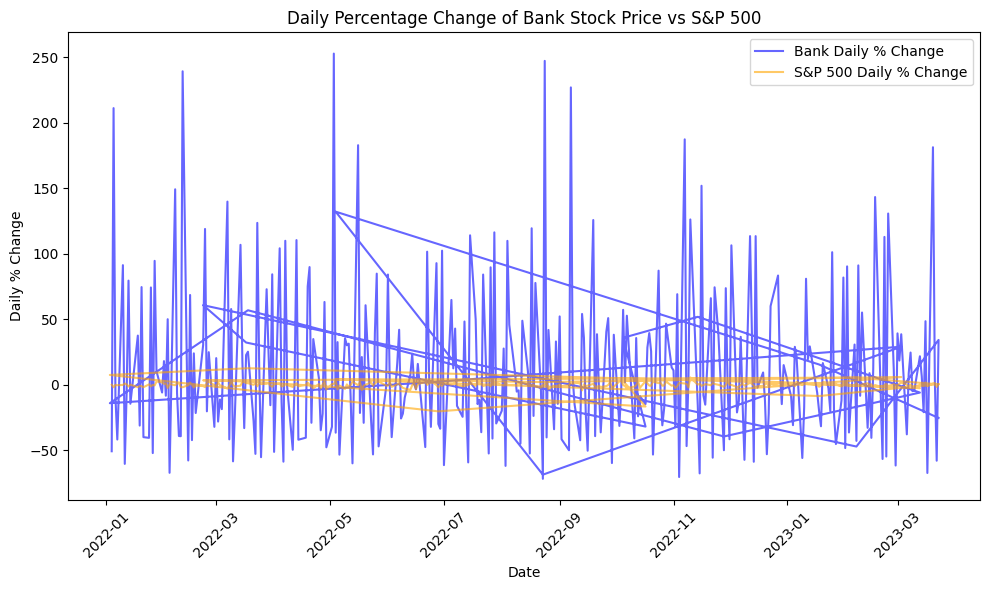

In [115]:
# Calculate daily percentage change
merged_df['Bank_Daily_Change'] = merged_df['Bank_Stock_Price'].pct_change() * 100
merged_df['SP500_Daily_Change'] = merged_df['S&P500'].pct_change() * 100

# Plot daily percentage changes
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Bank_Daily_Change'], label='Bank Daily % Change', color='blue', alpha=0.6)
plt.plot(merged_df['Date'], merged_df['SP500_Daily_Change'], label='S&P 500 Daily % Change', color='orange', alpha=0.6)

# Add title and labels
plt.title("Daily Percentage Change of Bank Stock Price vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


# Calculating Key Performance Indicators (KPIs)

To calculate the standard deviation and beta of the bank's stock relative to the S&P 500. These metrics provide insights into the volatility and sensitivity of the bank's stock price in relation to the S&P 500.

# Calculate Standard Deviation

The standard deviation measures the volatility of the stock prices, showing how much the bank's stock price fluctuates around its average (mean) value.

### Calculate the standard deviation of Bank Stock Price and S&P 500

In [18]:
bank_std_dev = merged_df['Bank_Stock_Price'].std()
sp500_std_dev = merged_df['S&P500'].std()
# Print the results
print(f"Standard Deviation of Bank Stock Price: {bank_std_dev:.2f}")
print(f"Standard Deviation of S&P 500: {sp500_std_dev:.2f}")


Standard Deviation of Bank Stock Price: 41.51
Standard Deviation of S&P 500: 269.78


Explanation:
    merged_df['Bank_Stock_Price'].std(): This calculates the standard deviation of the Myusabank’s stock price.
    merged_df['S&P500'].std(): This calculates the standard deviation of the S&P500(SPX).
    Interpretation:
        A higher standard deviation indicates more volatility, meaning the prices vary widely from the mean.
        A lower standard deviation implies the prices are relatively stable around the mean.

# Create a figure to compare volatility

To compare the volatility of the Bank Stock Price and the S&P 500, We can visualize their standard deviations using a bar chart. Here's a Python snippet using Matplotlib to create the figure.

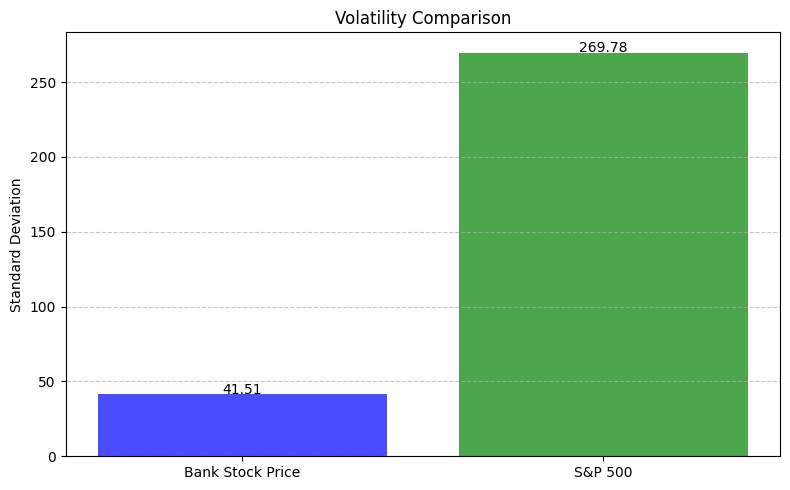

In [19]:
volatility = [bank_std_dev, sp500_std_dev] # Assuming `bank_std_dev` and `sp500_std_dev` are already defined
labels = ['Bank Stock Price', 'S&P 500']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, volatility, color=['blue', 'green'], alpha=0.7)
plt.title('Volatility Comparison')
plt.ylabel('Standard Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, v in enumerate(volatility):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


We first calculated the historical volatility for both myusabank and S&P500(SPX) stocks. Volatility is a measure of how much the stock’s price fluctuates over time. In this case, we are calculating the standard deviation of daily returns to measure the volatility. Then we visualized the calculated volatility to assess and compare the volatility or risk associated with both myusabank and GS&P500(SPX) stocks during the specified period. We can see that S&P500(SPX) volatility is higher than myusabank's.
It indicates that S&P500(SPX)’s stock price experienced larger price fluctuations or greater price variability over the specified time period than myusabank's stock price.

# Calculate Beta

Beta measures the sensitivity of the bank’s stock returns to the S&P 500’s returns. A beta value can be interpreted as follows:
    Beta > 1: The stock is more volatile than the S&P 500, meaning it amplifies market movements.
    Beta = 1: The stock moves in line with the market.
    Beta < 1: The stock is less volatile than the market, meaning it dampens market movements.

## Step-by-Step Code for Beta Calculation:

### 1. Calculate Daily Returns:
        First, we calculate the daily percentage change (return) for both the bank's stock and the S&P 500.

In [20]:
# Calculate daily returns for Bank Stock Price and S&P 500
merged_df['Bank_Returns'] = merged_df['Bank_Stock_Price'].pct_change()
merged_df['SP500_Returns'] = merged_df['S&P500'].pct_change()


pct_change() calculates the daily percentage change, representing the daily returns.
We add new columns Bank_Returns and SP500_Returns to merged_df for further analysis.

### 2. Calculate Covariance and Variance
        we calculate the covariance and variance between the bank’s stock returns and the S&P 500 returns. Covariance measures how two variables (in this case, the two returns) vary together. Variance measures the denominator in the beta formula.

In [21]:
# Calculate covariance of Bank and S&P 500 returns
covariance_bank_sp500 = merged_df[['Bank_Returns', 'SP500_Returns']].cov().iloc[0, 1]

# Calculate variance of S&P 500 returns
variance_sp500 = merged_df['SP500_Returns'].var()


    merged_df[['Bank_Returns', 'SP500_Returns']].cov() calculates the covariance matrix for both returns.
    iloc[0, 1] extracts the covariance value between Bank_Returns and SP500_Returns.
    merged_df['SP500_Returns'].var() calculates the variance of the S&P 500 returns.

### 3. Calculate Beta:
       Finally, calculate beta by dividing the covariance by the variance.

a. Calculate Beta for the Bank
Using the covariance and variance, calculate the bank's beta relative to the S&P 500.

In [22]:
# Calculate Beta for the Bank
beta_bank = covariance_bank_sp500 / variance_sp500
print(f"Beta of the Bank's Stock: {beta_bank:.2f}")

Beta of the Bank's Stock: 0.61


b. Calculate Beta for S&P 500
Since the S&P 500 is its own benchmark, its beta relative to itself is always 1. However, for clarity, we can compute it similarly.

In [23]:
# Calculate covariance of S&P 500 with itself
covariance_sp500_sp500 = merged_df['SP500_Returns'].cov(merged_df['SP500_Returns'])

# Calculate Beta for S&P 500
beta_sp500 = covariance_sp500_sp500 / variance_sp500
print(f"Beta of the S&P 500: {beta_sp500:.2f}")

Beta of the S&P 500: 1.00


The covariance of the S&P 500 with itself is equal to its variance. This ensures the beta of the S&P 500 is 1 (as expected).

 ### 4. Compare the Beta Values
Now, compare the beta values for the bank's stock and the S&P 500.

In [24]:
# Compare Beta values
print("Comparison of Beta Values:")
print(f"Bank's Beta: {beta_bank:.2f}")
print(f"S&P 500's Beta: {beta_sp500:.2f}")

if beta_bank > 1:
    print("The bank's stock is more volatile than the S&P 500.")
elif beta_bank < 1:
    print("The bank's stock is less volatile than the S&P 500.")
else:
    print("The bank's stock moves in perfect sync with the S&P 500.")


Comparison of Beta Values:
Bank's Beta: 0.61
S&P 500's Beta: 1.00
The bank's stock is less volatile than the S&P 500.


Beta of Bank's Stock:
    Indicates the sensitivity of the bank’s stock to market movements.
    A beta less than 1 means it is less volatile, moving more conservatively relative to the market.
Beta of S&P 500:
    Always equals 1 because it serves as the benchmark against which other stocks are measured.

# Analysis of Results

Standard Deviation:
    The standard deviation tells us about the volatility of the bank’s stock compared to the S&P 500. A higher standard deviation for the bank indicates it has more volatile price movements than the S&P 500.

Beta:
    Comparing beta values allows investors to assess the risk profile of the bank’s stock relative to the market.
    If the bank's beta is significantly different from 1, it can inform strategies for risk-averse or risk-seeking investors.

# Conclusion

My analysis showed that the myusabank’s stock price had a distinct relationship to the S&P 500, with varying levels of correlation and volatility. Through statistical and visual tools, we identified that the bank's stock generally followed broader market trends, though its sensitivity (beta) and volatility (standard deviation) provided additional context for investment risk.

By combining these methods, we obtained a robust understanding of the myusabank’s stock performance, and these insights could guide investors or stakeholders in making data-driven decisions. Future work could involve incorporating additional market indicators, refining the ARIMA model, or experimenting with machine learning models for potentially higher predictive accuracy. Overall, this project has demonstrated how data analysis and forecasting can provide significant insights into financial data and inform strategic decision-making.